In [1]:
!pip install -q datasets transformers sentence-transformers scipy pandas numpy seaborn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 132.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 105.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 111.8 MB/s eta 0:00:00


In [2]:
import os
if not os.path.exists("Semantic_Relatedness_SemEval2024"):
    !git clone https://github.com/semantic-textual-relatedness/Semantic_Relatedness_SemEval2024.git

Cloning into 'Semantic_Relatedness_SemEval2024'...
remote: Enumerating objects: 873, done.
remote: Counting objects: 100% (174/174), done.
remote: Compressing objects: 100% (152/152), done.
remote: Total 873 (delta 75), reused 22 (delta 20), pack-reused 699 (from 1)
Receiving objects: 100% (873/873), 13.37 MiB | 4.14 MiB/s, done.
Resolving deltas: 100% (390/390), done.


In [3]:
import pandas as pd

# hau_path = "Semantic_Relatedness_SemEval2024/Track A/hau/hau_train.csv"
# df = pd.read_csv(hau_path)
# df[['Sentence1', 'Sentence2']] = df['Text'].str.split('\n', expand=True)
# df = df[['Sentence1', 'Sentence2', 'Score']]
# df.head()


amh_path = "Semantic_Relatedness_SemEval2024/Track A/amh/amh_train.csv"
df = pd.read_csv(amh_path)
df[['Sentence1', 'Sentence2']] = df['Text'].str.split('\n', expand=True)
df = df[['Sentence1', 'Sentence2', 'Score']]
df.head()

,Sentence1,Sentence2,Score
0,መግለጫውን የተከታተለው የአዲስ አበባው ዘጋቢያችን ሰሎሞን ሙጬ ዝርዝር ዘ...,በስፍራው ተገኝቶ የተከታተለው የአዲስ አበባው ዘጋቢያችን ሰሎሞን ሙጬ ያጠ...,0.88
1,የኛ ዴሞክራሲ የእንግሊዝ ስርዓት ነው ፤ ለጊዜው ሊያገለግል ይችላል ።,( ሀ) “በሕጉ ዙሪያ ያለው አጥር ” ከንቱ ሆኖ የቀረው ለምንድን ነው ?,0.25
2,በዛሬው ጊዜ ከፍቅራዊ ደግነቱ መጠቀም የምንችለውስ እንዴት ነው ?,ጥንቃቄ ማድረግ የምንችለውስ እንዴት ነው ?,0.36
3,ግን ምን አይነት ቁልፍ ?,ምን አይነት ፍቅር ነዉ ?,0.27
4,ምን አይነት ተንኮለኛ ነው ?,አጭር ሰው ግን የምር ተንኮለኛ ነው ?,0.56


In [4]:

# from sentence_transformers import SentenceTransformer, util
# from scipy.stats import spearmanr

# baseline_model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

# sent1_emb = baseline_model.encode(df['Sentence1'].tolist(), convert_to_tensor=True)
# sent2_emb = baseline_model.encode(df['Sentence2'].tolist(), convert_to_tensor=True)

# cosine_scores = util.cos_sim(sent1_emb, sent2_emb).diagonal()

# baseline_spearman, _ = spearmanr(cosine_scores, df['Score'])
# print(f"Baseline Cosine Similarity Spearman Correlation: {baseline_spearman:.4f}")



from sentence_transformers import SentenceTransformer, util
from scipy.stats import spearmanr

# Load the baseline multilingual model
baseline_model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

# Encode sentence pairs
sent1_emb = baseline_model.encode(df['Sentence1'].tolist(), convert_to_tensor=True)
sent2_emb = baseline_model.encode(df['Sentence2'].tolist(), convert_to_tensor=True)

# Compute cosine similarities between the pairs
cosine_scores = util.cos_sim(sent1_emb, sent2_emb).diagonal()

# Move tensor to CPU and convert to numpy before Spearman calculation
cosine_scores_np = cosine_scores.cpu().numpy()

# Calculate Spearman correlation with human-annotated scores
baseline_spearman, _ = spearmanr(cosine_scores_np, df['Score'])

# Output result
print(f"Baseline Cosine Similarity Spearman Correlation: {baseline_spearman:.4f}")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.89k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Baseline Cosine Similarity Spearman Correlation: 0.3825


In [5]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [6]:
# from transformers import AutoModel, AutoTokenizer
# import torch.nn as nn
# import torch

# class TransformerRegressor(nn.Module):
#     def __init__(self, model_name):
#         super().__init__()
#         self.encoder = AutoModel.from_pretrained(model_name)
#         self.regressor = nn.Sequential(
#             nn.Dropout(0.1),
#             nn.Linear(self.encoder.config.hidden_size, 1)
#         )

#     def forward(self, input_ids, attention_mask):
#         output = self.en...

from transformers import AutoModel, AutoTokenizer
import torch.nn as nn
import torch

class TransformerRegressor(nn.Module):
    def __init__(self, model_name):
        super().__init__()
        self.encoder = AutoModel.from_pretrained(model_name)
        self.regressor = nn.Sequential(
            nn.Dropout(0.1),
            nn.Linear(self.encoder.config.hidden_size, 1)
        )

    def forward(self, input_ids, attention_mask):
        outputs = self.encoder(input_ids=input_ids, attention_mask=attention_mask)
        # Use the [CLS] token representation from the last hidden state
        cls_output = outputs.last_hidden_state[:, 0, :]
        score = self.regressor(cls_output)
        return score.squeeze(-1)


In [7]:
# from torch.utils.data import Dataset, DataLoader

# class SemRelDataset(Dataset):
#     def __init__(self, df, tokenizer, max_len=128):
#         self.sentence1 = df["Sentence1"].tolist()
#         self.sentence2 = df["Sentence2"].tolist()
#         self.labels = df["Score"].tolist()
#         self.tokenizer = tokenizer
#         self.max_len = max_len

#     def __len__(self):
#         return len(self.labels)

#     def __getitem__(self, idx):
#         enc = self.tokenizer(self.s...

from torch.utils.data import Dataset
import torch

class SemRelDataset(Dataset):
    def __init__(self, df, tokenizer, max_len=128):
        self.sentence1 = df["Sentence1"].tolist()
        self.sentence2 = df["Sentence2"].tolist()
        self.labels = df["Score"].tolist()
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        enc = self.tokenizer(
            self.sentence1[idx],
            self.sentence2[idx],
            truncation=True,
            padding="max_length",
            max_length=self.max_len,
            return_tensors="pt"
        )

        return {
            "input_ids": enc["input_ids"].squeeze(0),
            "attention_mask": enc["attention_mask"].squeeze(0),
            "labels": torch.tensor(self.labels[idx], dtype=torch.float)
        }


In [8]:
# from tqdm import tqdm
# from sklearn.metrics import mean_squared_error
# from scipy.stats import spearmanr


# def train(model, loader, optimizer, criterion, device):
#     model.train()
#     total_loss = 0
#     for batch in tqdm(loader):
#         input_ids = batch["input_ids"].to(device)
#         attention_mask = batch["attention_mask"].to(device)
#         labels = batch["labels"].to(device)

#         optimizer.zero_grad()
#         preds = model(input_ids, attention_mask)....

from tqdm import tqdm
from sklearn.metrics import mean_squared_error
from scipy.stats import spearmanr
import torch

def train(model, loader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    for batch in tqdm(loader):
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        optimizer.zero_grad()
        preds = model(input_ids, attention_mask)
        loss = criterion(preds, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(loader)
    return avg_loss


def evaluate(model, loader, device):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for batch in loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)
            preds = model(input_ids, attention_mask)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    mse = mean_squared_error(all_labels, all_preds)
    spearman, _ = spearmanr(all_labels, all_preds)
    return mse, spearman, all_preds


In [9]:
# # import torch

# # model_names = {
# #     "XLM-R": "xlm-roberta-base",
# #     "mBERT": "bert-base-multilingual-cased",
# #     "AfroXLMR": "Davlan/afro-xlmr-base"
# # }

# # results = []
# # error_records = {}
# # device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # for label, model_id in model_names.items():
# #     print(f"\nTraining model: {label}")
# #     tokenizer = AutoTokenizer.from_pretrained(model_id)
# #     train_set = SemRelDataset(train_df, tokenizer)
# #     val_set = S...

# import torch
# from torch.utils.data import DataLoader
# from torch.optim import AdamW
# from transformers import AutoTokenizer

# model_names = {
#     "XLM-R": "xlm-roberta-base",
#     "mBERT": "bert-base-multilingual-cased",
#     "AfroXLMR": "Davlan/afro-xlmr-base"
# }

# results = []
# error_records = {}
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# for label, model_id in model_names.items():
#     print(f"\nTraining model: {label}")

#     # Tokenizer and datasets
#     tokenizer = AutoTokenizer.from_pretrained(model_id)
#     train_set = SemRelDataset(train_df, tokenizer)
#     val_set = SemRelDataset(val_df, tokenizer)

#     train_loader = DataLoader(train_set, batch_size=8, shuffle=True)
#     val_loader = DataLoader(val_set, batch_size=8)

#     # Model and training setup
#     model = TransformerRegressor(model_id).to(device)
#     optimizer = AdamW(model.parameters(), lr=2e-5)
#     criterion = nn.MSELoss()

#     # Training loop
#     # for epoch in range(3):
#     #     print(f"Epoch {epoch+1}")
#     #     train_loss = train(model, train_loader, optimizer, criterion, device)
#     #     print(f"Training Loss: {train_loss:.4f}")

#     best_spearman = -1
#     patience = 3
#     no_improve = 0
#     epochs = 15

#     for epoch in range(epochs):
#         print(f"\nEpoch {epoch+1}/{epochs}")
#         train_loss = train(model, train_loader, optimizer, criterion, device)
#         mse, spearman, preds = evaluate(model, val_loader, device)

#         print(f"Training Loss: {train_loss:.4f}")
#         print(f"Validation Spearman: {spearman:.4f} | MSE: {mse:.4f}")

#         if spearman > best_spearman:
#             best_spearman = spearman
#             best_model = model.state_dict()
#             best_preds = preds
#             no_improve = 0
#         else:
#             no_improve += 1

#         if no_improve >= patience:
#             print("Early stopping triggered.")
#             break

#     model.load_state_dict(best_model)


#     # Evaluation
#     mse, spearman, preds = evaluate(model, val_loader, device)
#     print(f"Spearman Correlation: {spearman:.4f}")
#     print(f"MSE: {mse:.4f}")

#     results.append((label, spearman, mse))
#     error_records[label] = (val_df.reset_index(drop=True), preds)

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.optim import AdamW
from transformers import AutoTokenizer
import pandas as pd

# Define models
model_names = {
    "XLM-R": "xlm-roberta-base",
    "mBERT": "bert-base-multilingual-cased",
    "AfroXLMR": "Davlan/afro-xlmr-base",
    "AfriBERTa": "castorini/afriberta_large"
}

results = []
error_records = {}
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for label, model_id in model_names.items():
    print(f"\n🔧 Training model: {label}")

    # Tokenizer and datasets
    tokenizer = AutoTokenizer.from_pretrained(model_id)
    train_set = SemRelDataset(train_df, tokenizer)
    val_set = SemRelDataset(val_df, tokenizer)

    train_loader = DataLoader(train_set, batch_size=8, shuffle=True)
    val_loader = DataLoader(val_set, batch_size=8)

    # Model and training setup
    model = TransformerRegressor(model_id).to(device)
    optimizer = AdamW(model.parameters(), lr=2e-5)
    criterion = nn.MSELoss()

    best_spearman = -1
    best_mse = float("inf")
    patience = 3
    no_improve = 0
    epochs = 15

    for epoch in range(epochs):
        print(f"\nEpoch {epoch+1}/{epochs}")
        train_loss = train(model, train_loader, optimizer, criterion, device)
        mse, spearman, preds = evaluate(model, val_loader, device)

        print(f"Training Loss: {train_loss:.4f}")
        print(f"Validation Spearman: {spearman:.4f} | MSE: {mse:.4f}")

        if spearman > best_spearman:
            best_spearman = spearman
            best_mse = mse
            best_model = model.state_dict()
            best_preds = preds
            no_improve = 0
        else:
            no_improve += 1

        if no_improve >= patience:
            print("⏹️ Early stopping triggered.")
            break

    # Load best weights and evaluate
    model.load_state_dict(best_model)
    results.append((label, best_spearman, best_mse))
    error_records[label] = (val_df.reset_index(drop=True), best_preds)

# Final summary
df_results = pd.DataFrame(results, columns=["Model", "Spearman", "MSE"])
df_results = df_results.sort_values(by="Spearman", ascending=False)
print("\n📊 Final Model Performance Summary:")
print(df_results.to_string(index=False))




🔧 Training model: XLM-R


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]


Epoch 1/15


100%|██████████| 100/100 [00:17<00:00,  5.79it/s]


Training Loss: 0.0855
Validation Spearman: 0.5224 | MSE: 0.0392

Epoch 2/15


100%|██████████| 100/100 [00:15<00:00,  6.26it/s]


Training Loss: 0.0682
Validation Spearman: 0.6577 | MSE: 0.0317

Epoch 3/15


100%|██████████| 100/100 [00:16<00:00,  6.21it/s]


Training Loss: 0.0703
Validation Spearman: 0.6005 | MSE: 0.0358

Epoch 4/15


100%|██████████| 100/100 [00:16<00:00,  6.18it/s]


Training Loss: 0.0579
Validation Spearman: 0.6988 | MSE: 0.0234

Epoch 5/15


100%|██████████| 100/100 [00:16<00:00,  6.16it/s]


Training Loss: 0.0578
Validation Spearman: 0.6876 | MSE: 0.0318

Epoch 6/15


100%|██████████| 100/100 [00:16<00:00,  6.12it/s]


Training Loss: 0.0502
Validation Spearman: 0.7122 | MSE: 0.0242

Epoch 7/15


100%|██████████| 100/100 [00:16<00:00,  6.07it/s]


Training Loss: 0.0408
Validation Spearman: 0.7564 | MSE: 0.0216

Epoch 8/15


100%|██████████| 100/100 [00:16<00:00,  6.07it/s]


Training Loss: 0.0349
Validation Spearman: 0.7373 | MSE: 0.0194

Epoch 9/15


100%|██████████| 100/100 [00:16<00:00,  6.10it/s]


Training Loss: 0.0311
Validation Spearman: 0.7371 | MSE: 0.0244

Epoch 10/15


100%|██████████| 100/100 [00:16<00:00,  6.11it/s]


Training Loss: 0.0297
Validation Spearman: 0.7388 | MSE: 0.0197
⏹️ Early stopping triggered.

🔧 Training model: mBERT


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]


Epoch 1/15


100%|██████████| 100/100 [00:12<00:00,  7.79it/s]


Training Loss: 0.0677
Validation Spearman: 0.1951 | MSE: 0.0565

Epoch 2/15


100%|██████████| 100/100 [00:12<00:00,  7.73it/s]


Training Loss: 0.0554
Validation Spearman: 0.1672 | MSE: 0.0477

Epoch 3/15


100%|██████████| 100/100 [00:12<00:00,  7.74it/s]


Training Loss: 0.0521
Validation Spearman: 0.1805 | MSE: 0.0402

Epoch 4/15


100%|██████████| 100/100 [00:12<00:00,  7.78it/s]


Training Loss: 0.0517
Validation Spearman: 0.1600 | MSE: 0.0433
⏹️ Early stopping triggered.

🔧 Training model: AfroXLMR


tokenizer_config.json:   0%|          | 0.00/398 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/707 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Some weights of XLMRobertaModel were not initialized from the model checkpoint at Davlan/afro-xlmr-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Epoch 1/15


100%|██████████| 100/100 [00:16<00:00,  6.11it/s]


Training Loss: 0.1186
Validation Spearman: 0.6727 | MSE: 0.0247

Epoch 2/15


100%|██████████| 100/100 [00:16<00:00,  6.05it/s]


Training Loss: 0.0460
Validation Spearman: 0.7497 | MSE: 0.0226

Epoch 3/15


100%|██████████| 100/100 [00:16<00:00,  6.05it/s]


Training Loss: 0.0349
Validation Spearman: 0.7602 | MSE: 0.0268

Epoch 4/15


100%|██████████| 100/100 [00:16<00:00,  6.07it/s]


Training Loss: 0.0379
Validation Spearman: 0.7872 | MSE: 0.0151

Epoch 5/15


100%|██████████| 100/100 [00:16<00:00,  6.09it/s]


Training Loss: 0.0272
Validation Spearman: 0.8019 | MSE: 0.0287

Epoch 6/15


100%|██████████| 100/100 [00:16<00:00,  6.09it/s]


Training Loss: 0.0235
Validation Spearman: 0.8089 | MSE: 0.0163

Epoch 7/15


100%|██████████| 100/100 [00:16<00:00,  6.08it/s]


Training Loss: 0.0238
Validation Spearman: 0.8127 | MSE: 0.0223

Epoch 8/15


100%|██████████| 100/100 [00:16<00:00,  6.07it/s]


Training Loss: 0.0200
Validation Spearman: 0.7906 | MSE: 0.0257

Epoch 9/15


100%|██████████| 100/100 [00:16<00:00,  6.07it/s]


Training Loss: 0.0178
Validation Spearman: 0.7975 | MSE: 0.0158

Epoch 10/15


100%|██████████| 100/100 [00:16<00:00,  6.08it/s]


Training Loss: 0.0153
Validation Spearman: 0.7857 | MSE: 0.0178
⏹️ Early stopping triggered.

🔧 Training model: AfriBERTa


tokenizer_config.json:   0%|          | 0.00/257 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/731 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/1.55M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:564: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/503M [00:00<?, ?B/s]

Some weights of XLMRobertaModel were not initialized from the model checkpoint at castorini/afriberta_large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Epoch 1/15


  1%|          | 1/100 [00:00<00:10,  9.85it/s]

model.safetensors:   0%|          | 0.00/503M [00:00<?, ?B/s]

100%|██████████| 100/100 [00:09<00:00, 10.04it/s]


Training Loss: 0.1200
Validation Spearman: 0.4236 | MSE: 0.0665

Epoch 2/15


100%|██████████| 100/100 [00:09<00:00, 10.06it/s]


Training Loss: 0.0560
Validation Spearman: 0.5539 | MSE: 0.0280

Epoch 3/15


100%|██████████| 100/100 [00:09<00:00, 10.03it/s]


Training Loss: 0.0498
Validation Spearman: 0.6041 | MSE: 0.0283

Epoch 4/15


100%|██████████| 100/100 [00:09<00:00, 10.03it/s]


Training Loss: 0.0391
Validation Spearman: 0.6281 | MSE: 0.0274

Epoch 5/15


100%|██████████| 100/100 [00:09<00:00, 10.08it/s]


Training Loss: 0.0311
Validation Spearman: 0.7058 | MSE: 0.0207

Epoch 6/15


100%|██████████| 100/100 [00:09<00:00, 10.10it/s]


Training Loss: 0.0280
Validation Spearman: 0.6971 | MSE: 0.0202

Epoch 7/15


100%|██████████| 100/100 [00:09<00:00, 10.11it/s]


Training Loss: 0.0283
Validation Spearman: 0.6745 | MSE: 0.0437

Epoch 8/15


100%|██████████| 100/100 [00:09<00:00, 10.11it/s]


Training Loss: 0.0243
Validation Spearman: 0.7326 | MSE: 0.0175

Epoch 9/15


100%|██████████| 100/100 [00:09<00:00, 10.10it/s]


Training Loss: 0.0199
Validation Spearman: 0.7526 | MSE: 0.0227

Epoch 10/15


100%|██████████| 100/100 [00:09<00:00, 10.09it/s]


Training Loss: 0.0199
Validation Spearman: 0.7210 | MSE: 0.0199

Epoch 11/15


100%|██████████| 100/100 [00:09<00:00, 10.06it/s]


Training Loss: 0.0199
Validation Spearman: 0.7357 | MSE: 0.0349

Epoch 12/15


100%|██████████| 100/100 [00:09<00:00, 10.03it/s]


Training Loss: 0.0175
Validation Spearman: 0.7670 | MSE: 0.0168

Epoch 13/15


100%|██████████| 100/100 [00:09<00:00, 10.05it/s]


Training Loss: 0.0127
Validation Spearman: 0.7554 | MSE: 0.0166

Epoch 14/15


100%|██████████| 100/100 [00:09<00:00, 10.03it/s]


Training Loss: 0.0138
Validation Spearman: 0.7761 | MSE: 0.0152

Epoch 15/15


100%|██████████| 100/100 [00:09<00:00, 10.08it/s]


Training Loss: 0.0113
Validation Spearman: 0.7802 | MSE: 0.0188

📊 Final Model Performance Summary:
    Model  Spearman      MSE
 AfroXLMR  0.812708 0.022256
AfriBERTa  0.780156 0.018820
    XLM-R  0.756398 0.021647
    mBERT  0.195080 0.056496


In [10]:
results_df = pd.DataFrame(results, columns=["Model", "Spearman", "MSE"])
print("Final Evaluation Table:")
print(results_df)

Final Evaluation Table:
       Model  Spearman       MSE
0      XLM-R  0.756398  0.021647
1      mBERT  0.195080  0.056496
2   AfroXLMR  0.812708  0.022256
3  AfriBERTa  0.780156  0.018820


In [11]:
# import numpy as np

# for label, records in error_records.items():
#     val, preds = records
#     errors = np.abs(np.array(preds) - np.array(val['Score'].tolist()))
#     top_errors = np.argsort(errors)[-3:]
#     print(f"\nTop errors for {label}:")
#     for i in top_errors:
#         print(f"Sentence 1: {val.iloc[i]['Sentence1']}")
#         print(f"Sentence 2: {val.iloc[i]['Sentence2']}")
#         print(f"Human Score: {val.iloc[i]['Score']:.2f} | Predicted: {preds[i]:.2f} |...

import numpy as np

for label, records in error_records.items():
    val, preds = records
    errors = np.abs(np.array(preds) - np.array(val['Score'].tolist()))
    top_errors = np.argsort(errors)[-3:]  # Get indices of top 3 largest errors
    print(f"\nTop errors for {label}:")
    for i in top_errors:
        print(f"\nSentence 1: {val.iloc[i]['Sentence1']}")
        print(f"Sentence 2: {val.iloc[i]['Sentence2']}")
        print(f"Human Score: {val.iloc[i]['Score']:.2f} | Predicted: {preds[i]:.2f} | Error: {errors[i]:.2f}")



Top errors for XLM-R:

Sentence 1: ተረጋጋ ሐኪም ውወተ መነም . እኔ ምንም አልተናገረም ርበነ ዬኛደጓ ኔእ ።
Sentence 2: መነም . እኔ ምንም አልተናገረም ርበነ ቅውአ ንትንዴ ይቬርሃ ተረጋጋ ሐኪም ርበነ ዬኛደጓ ኔእ ።
Human Score: 0.41 | Predicted: 0.78 | Error: 0.37

Sentence 1: እኔ የማይገባኝ እኮ አንድ ነገር ነው ፡፡
Sentence 2: ያልገባኝ ፣የማይገባኝ - እንዴት ብሎ ።
Human Score: 0.31 | Predicted: 0.69 | Error: 0.38

Sentence 1: አዲስ አበባ ዛሬ የጣለው ዝናብ ?
Sentence 2: ወንድ ባሪያና ሴት ባሪያ መግዛት ብትፈልግ ግን በዙሪያችሁ ካሉት ከእነርሱ ከአሕዛብ ወንድና ሴት ባሪያዎችን ግዙ።
Human Score: 0.05 | Predicted: 0.55 | Error: 0.50

Top errors for mBERT:

Sentence 1: ማንኛዉም የአስተዳደር ተቋም የሚያወጣውን መመሪያ በተመለከተ የሚከተሉትን የያዘ መዝገብ ማደራጀት አለበት ፤ ።
Sentence 2: ማንኛውም የአስተዳደር ተቋም መመሪያ በሚያወጣበት ጊዜ የሚከተሉትን መረጃዎች የያዘ ማብራሪያ ማዘጋጀት አለበት ፤ ።
Human Score: 0.91 | Predicted: 0.35 | Error: 0.56

Sentence 1: በምሥራቅ ወለጋ በተፈጸመ ጥቃት በርካታ ሰዎች መገደላቸው ተነገረ ።
Sentence 2: በምሥራቅ ወለጋ በተፈጸመ ጥቃት ሰዎች ተገደሉ ፤ ቤቶች ተቃጠሉ ።
Human Score: 0.94 | Predicted: 0.36 | Error: 0.58

Sentence 1: ልዑል አምላክ እግዚአብሔር ኢትዮጵያንና ሕዝቦቿን ይጠብቅ !
Sentence 2: ልዑል አምላክ ቅዱስ እግዚአብሔር ኢትዮጵያንና ሕዝ

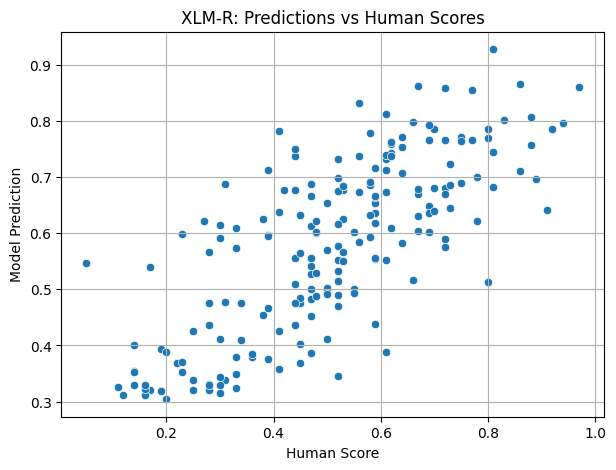

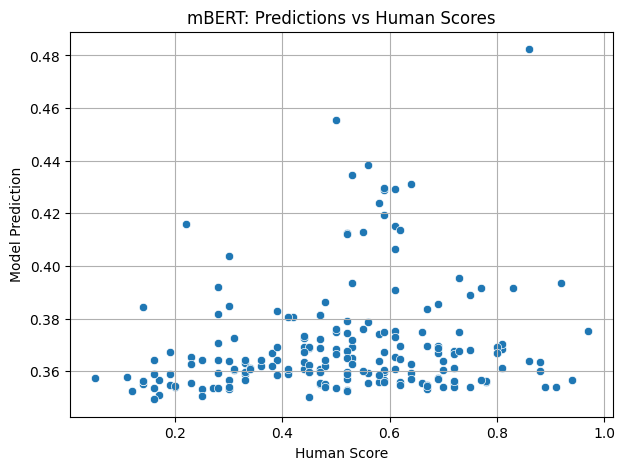

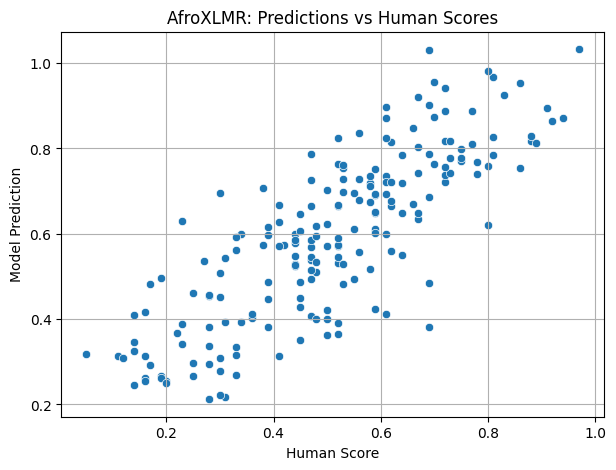

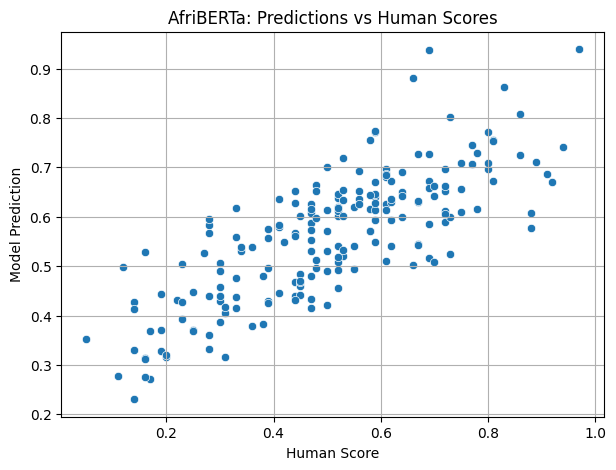

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

for label, records in error_records.items():
    val, preds = records
    truths = val['Score'].tolist()
    plt.figure(figsize=(7, 5))
    sns.scatterplot(x=truths, y=preds)
    plt.title(f"{label}: Predictions vs Human Scores")
    plt.xlabel("Human Score")
    plt.ylabel("Model Prediction")
    plt.grid(True)
    plt.show()

In [14]:
import numpy as np
from scipy.stats import spearmanr
from sklearn.metrics import mean_squared_error

# Select models for the ensemble
# ensemble_models = ["AfroXLMR", "XLM-R"]
# ensemble_models = ["AfroXLMR", "XLM-R", "mBERT"]
ensemble_models = ["AfroXLMR", "XLM-R", "mBERT", "AfriBERTa"]

# Extract predictions and ground truth
ensemble_preds = []
ground_truth = None

for name in ensemble_models:
    df, preds = error_records[name]
    ensemble_preds.append(np.array(preds))
    if ground_truth is None:
        ground_truth = df["Score"].values

# Average predictions
ensemble_avg = np.mean(ensemble_preds, axis=0)

# Evaluate ensemble
ensemble_spearman, _ = spearmanr(ensemble_avg, ground_truth)
ensemble_mse = mean_squared_error(ground_truth, ensemble_avg)

print("\n📊 Ensemble Evaluation (AfroXLMR + XLM-R):")
print(f"Spearman Correlation: {ensemble_spearman:.4f}")
print(f"MSE: {ensemble_mse:.4f}")

# Add to final results table
results.append(("Ensemble (AfroXLMR+XLM-R+mBERT)", ensemble_spearman, ensemble_mse))



📊 Ensemble Evaluation (AfroXLMR + XLM-R):
Spearman Correlation: 0.8423
MSE: 0.0146
